![NumPy Logo](images/numpy_logo.jpg)

- [El 'ndarray' de NumPy: un Array Multidimensional](#ndarray)
    - [Creando ndarrays](#creando)
    - [Copias y vistas](#copias)
    - [Recorrido sobre NumPy Arrays](#recorrido)
    - [Aritmética con NumPy Arrays](#aritmetica)
    - [Funciones Universales](#funciones_universales)
    - [Manipulación de dimensiones](#dimensiones)
    - [Indexación y Partición básicas](#indexacion)
    - [Indexación avanzada](#indexación_avanzada)
    - [Concatenación y división de arrays](#concatenacion)
    - [Programación orientada a Arrays](#programacion)
        - [Expresando lógica condicional como operaciones sobre Arrays](#logica_condicional)
        - [Métodos Estadísticos y Matemáticos](#metodos_estadisticos)
        - [Métodos para Arrays boleanos](#metodos_boleanos)
        - [Ordenación](#ordenacion)
        - [Unique y otras lógicas de conjuntos](#unique)
    - [Salvado y recuperación de Arrays en disco](#disco)
    - [Algebra Lineal](#algebra)
    - [Generación de número pseudoaleatorios](#pseudoaleatorios)
    - [Arrays Estructurados (registros)](#registros)
    - [Datetimes y Timedeltas](#datetimes)
    
---

# NumPy: Computación con Matrices
NumPy, abreviatura de *Numerical Python*, es uno de los paquetes fundamentales más importantes para la computación numérica en Python. La mayoría de los paquetes computacionales que proporcionan funcionalidad científica utilizan los objetos de matriz de NumPy como *lingua franca* para el intercambio de datos.

La librería `NumPy` es necesario importarla para proceder a su utilización:

In [1]:
# importación de la librería, el alias es 'np' por convención
import numpy as np
np.__version__

'2.0.2'

Algunos de los componentes de NumPy son:
*  `ndarray`, una matriz multidimensional eficiente que proporciona una arquitectura rápida orientada a matrices y operaciones aritméticas.
* Funciones matemáticas para operaciones rápidas sobre matrices completas de datos sin tener que escribir bucles.
* Herramientas para leer/escribir datos de matrices en el disco y trabajar con archivos asignados en memoria.
* Álgebra lineal, generación de números aleatorios y capacidades de transformaciones de Fourier.
* Una API de C para conectar NumPy con bibliotecas escritas en C, C ++ o FORTRAN.

Si bien NumPy por sí solo no proporciona funciones de modelado o científicas, comprender las matrices de NumPy y la computación orientada a matrices es esencial para usar herramientas con semántica orientada a matrices, como Pandas, mucho más efectivamente.

Las principales áreas de funcionalidad para la mayoría de las aplicaciones de análisis de datos son:
* Operaciones rápidas sobre matrices vectorizadas para la recopilación y limpieza de datos, definición de subconjuntos y filtros, transformación y cualquier otro tipo de cálculo.
* Algoritmos comunes sobre matrices como clasificación y operaciones de conjuntos.
* Estadística descriptiva eficiente con agregación/resumen de datos
* Alineación de datos y manipulación de datos relacionales para fusionar y unir conjuntos de datos heterogéneos.
* Expresar la lógica condicional como expresiones matriciales en lugar de bucles con ramas if-elif-else
* Manipulaciones de datos a nivel de grupo (agregación, transformación, aplicación de funciones)

Una de las razones por las que NumPy es tan importante para los cálculos numéricos en Python es porque está diseñado para la eficiencia en grandes conjuntos de datos. Hay un número de razones para esto:
* NumPy almacena internamente los datos en un bloque de memoria contiguo, independientemente de otros objetos Python incorporados. La biblioteca de algoritmos de NumPy escrita en el lenguaje C puede operar en esta memoria sin ningún tipo de verificación de tipo u otra sobrecarga. Las matrices NumPy también usan mucha menos memoria que las secuencias Python incorporadas.
* Las operaciones NumPy realizan cálculos complejos en matrices completas sin la necesidad de bucles Python.



Para dar una idea de la diferencia de rendimiento, consideremos una matriz NumPy de un millón de enteros y la lista equivalente de Python:

In [2]:
# import numpy as np
my_arr = np.arange(10000000)

# multiplicamos cada secuencia por 2 y obtenemos los tiempos
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: total: 188 ms
Wall time: 235 ms


In [3]:
my_list = list(range(10000000))
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: total: 5.56 s
Wall time: 7.01 s


La diferencia clave entre una `matriz` NumPy y una `lista` Python es que las matrices están diseñadas para manejar operaciones vectorizadas mientras que una lista de Python está diseñada para realizar operaciones sobre cada uno de sus componentes.

In [4]:
# Generamos algunos datos aleatorios
data = np.random.randn(2, 3) # método `randn` del subpaquete 'random'
data

array([[-0.6104592 , -0.09404636,  0.11194184],
       [-1.28480168,  1.86208533,  1.56235355]])

In [5]:
# multiplicamos por 10 el array
data * 10

array([[ -6.10459195,  -0.94046357,   1.11941837],
       [-12.8480168 ,  18.62085328,  15.62353552]])

In [6]:
# sumamos el array con el mismo
data + data

array([[-1.22091839, -0.18809271,  0.22388367],
       [-2.56960336,  3.72417066,  3.1247071 ]])

Los algoritmos basados en NumPy son generalmente de 10 a 100 veces más rápidos (o más) que sus equivalentes puros de Python y utilizan significativamente menos memoria.

### Tipos de datos NumPy
Python define solo un tipo de una clase de datos particular (solo hay un tipo entero, un tipo de punto flotante, etc.). Esto puede ser conveniente en aplicaciones que no necesitan preocuparse por todas las formas en que se pueden representar los datos en una computadora. Para la computación científica, sin embargo, a menudo se necesita más control.

En NumPy, hay 24 nuevos tipos fundamentales de Python para describir diferentes tipos de escalares. Estos descriptores de tipo se basan principalmente en los tipos disponibles en el lenguaje C en el que está escrito CPython, con varios tipos adicionales compatibles con los tipos de Python.

![Jerarquía de tipos](./images/dtype-hierarchy.png)


<a id="ndarray"></a>
## El `ndarray` de NumPy: un Array Multidimensional
Una de las características clave de NumPy es su objeto de matriz N-dimensional, o `ndarray`, que es un contenedor rápido y flexible para grandes conjuntos de datos en Python. Las matrices le permiten realizar operaciones matemáticas en bloques enteros de datos utilizando una sintaxis similar a las operaciones equivalentes entre elementos escalares. Un `ndarray` describe una colección de "elementos" del mismo tipo. Los elementos se pueden indexar utilizando, por ejemplo, N enteros.

Todos los ndarrays son homogéneos: cada elemento ocupa el mismo tamaño de bloque de memoria, y todos los bloques se interpretan de la misma manera. La forma en que debe interpretarse cada elemento de la matriz se especifica mediante un objeto de tipo de datos independiente, uno de los cuales está asociado con cada matriz. Además de los tipos básicos (enteros, flotantes, etc.), los objetos de tipo de datos también pueden representar estructuras de datos.

Un elemento extraído de una matriz, por ejemplo, mediante la indexación, se representa mediante un objeto Python cuyo tipo es uno de los tipos escalares de matriz integrados en NumPy. Los escalares de matriz permiten una fácil manipulación de arreglos de datos también más complicados.

El NumPy `ndarray` proporciona un medio para interpretar un bloque de datos homogéneos (ya sea contiguos o no) como una matriz multidimensional. Parte de lo que hace que un `ndarray` sea flexible es ser una vista sobre un bloque de datos, no es sólo una porción de memoria sino que contiene información sobre los datos, cómo localizar un elemento y cómo interpretar un elemento. Más precisamente, el `ndarray` internamente consiste en lo siguiente:  

 - Un puntero a los datos (`data`), es decir, un bloque de datos en la RAM o en un archivo asignado en memoria
 - El tipo de dato (`dtype`), que describe celdas de valor de tamaño fijo en la matriz
 - Una tupla que indica la forma de la matriz (`shape`)
 - Una tupla de pasos (`strides`), que son el número de bytes que se deben omitir en la memoria para ir al siguiente elemento. Si el valor es (10,1), hace falta un byte para llegar a la siguiente columna y 10 bytes para ubicar la siguiente fila.
 - Indicadores (`flags`) que definen entre otros elementos si se nos permite modificar la matriz, si el diseño de la memoria es formato C o Fortran, y así sucesivamente.
 
![Estructura ndarray](./images/ndarray.png)

Resumiendo, podemos ver un `ndarray` como un contenedor genérico multidimensional para **datos homogéneos**; es decir, todos los elementos deben ser del mismo tipo. Indexado por una tupla de valores enteros positivos. En NumPy las dimensiones se denominan `ejes`. Los atributos más importantes de un objeto `ndarray` son:

|Atributos|Descripción|
|---|---|
|ndarray.flags|Información sobre el diseño de memoria de la matriz|
|ndarray.shape|Tuple de dimensiones de matriz|
|ndarray.strides|Tupla de bytes para pasar en cada dimensión al atravesar una matriz|
|ndarray.ndim|Número de dimensiones de la matriz|
|ndarray.data|El objeto de búfer de Python que apunta al inicio de los datos de la matriz|
|ndarray.dtype|Objeto que describe el tipo de los elementos en la matriz|
|ndarray.size|Número de elementos en la matriz|
|ndarray.itemsize|Longitud de un elemento de matriz en bytes|
|ndarray.nbytes|Total de bytes consumidos por los elementos de la matriz|
|ndarray.base|Objeto base si la memoria es de otro objeto|


In [7]:
f'{data.ndim} dimensiones {data.shape}, un tamaño de {data.size} elementos de tipo {data.dtype}'

'2 dimensiones (2, 3), un tamaño de 6 elementos de tipo float64'

### Diseño de memoria interna de un 'ndarray'

Una instancia de la clase `ndarray` consiste en un segmento unidimensional contiguo de la memoria de la computadora (que pertenece a la matriz o por algún otro objeto), combinado con un esquema de indexación que asigna N enteros a la ubicación de un elemento en el bloque. Los rangos en los que pueden variar los índices están especificados por la forma de la matriz. La cantidad de bytes que toma cada elemento y cómo se interpretan los bytes se define por el objeto de tipo de datos asociado con la matriz.

Un segmento de la memoria es inherentemente unidimensional, y hay muchos esquemas diferentes para organizar los elementos de una matriz N-dimensional en un bloque unidimensional. NumPy es flexible, y los objetos ndarray pueden adaptarse a cualquier esquema de indexación por pasos.

![Estructura ndarray](./images/ndarray_struct.png)


<a id="creando"></a>
### Creando ndarrays
La forma más fácil de crear una matriz es usar la función `array` que acepta cualquier objeto similar a una secuencia (incluidas otras matrices) y produce una nueva matriz NumPy que contiene los datos pasados.

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Las secuencias anidadas, como una lista de listas de igual longitud, se convertirán en una matriz multidimensional:

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
print('{0} ejes con tamaños {1}'.format(arr2.ndim, arr2.shape))

2 ejes con tamaños (2, 4)


El tipo de los datos de un `ndarray` puede ser especificado en tiempo de creación. En caso contrario el ajuste se realiza automáticamente.Si la conversión fallara por algún motivo (como una cadena que no se puede convertir a `float64`), se generará el correspondiente `ValueError`:

In [11]:
arr3 = np.array( [ [1,2], [3,4] ], dtype=complex )
arr3

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [12]:
arr1.dtype

dtype('float64')

In [13]:
arr2.dtype

dtype('int32')

A menudo, los elementos de una matriz son originalmente desconocidos, pero su tamaño es conocido. Por lo tanto, NumPy ofrece varias funciones para crear matrices con contenido de marcador de posición inicial. Estos minimizan la necesidad de matrices dinámicas, una operación costosa. También se puede especificar el tipo de datos configurando el argumento `dtype`. Algunos de los tipos de tipos más comunes son: 'float', 'int', 'bool', 'str' y 'object', pero para controlar las asignaciones de memoria, se puede optar por usar 'float32', 'float64', 'int8', 'int16' o 'int32'. Por defecto, el `dtype` de la matriz creada es `float64`. Independientemente del tipo original de los datos de una matriz, éste se podrá cambiar utilizando el método `astype`.

La función `zeros` crea una matriz llena de ceros, la función `ones` crea una matriz llena de unos y la función `empty` crea una matriz cuyo contenido inicial es aleatorio y depende del estado de la memoria. 

In [14]:
arr1 = np.zeros((3, 6))
arr1
arr1.dtype

dtype('float64')

In [15]:
arr1.astype('int64')
arr1.dtype

dtype('float64')

In [16]:
arr1.astype('int').astype('str')

array([['0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0']], dtype='<U11')

In [17]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
np.empty((2, 3, 2), dtype=np.int16)

array([[[12608, 24879],
        [  472,     0],
        [    0,     0]],

       [[    0,     0],
        [    2,     2],
        [24936, 25968]]], dtype=int16)

>No es seguro asumir que `np.empty` devolverá una matriz de todos los ceros. En algunos casos, puede devolver valores "basura" sin inicializar.

A diferencia de las listas todos los elementos de una matriz numpy debe ser del mismo tipo de datos. Esta es otra diferencia significativa. Sin embargo, si no se está seguro de qué tipo de datos tendrá una matriz o si se desea mantener caracteres y números en la misma matriz, se puede configurar el tipo de `dtype` como `object`.

In [19]:
arr1_obj = np.array([1, 'a'], dtype='object')
arr1_obj

array([1, 'a'], dtype=object)

Un `array` Numpy siempre se puede convertir en una `lista` Python utilizando el método `tolist()`:

In [20]:
arr1_obj.tolist()

[1, 'a']

Para resumir, las principales diferencias con las listas de python son:

 - Las matrices admiten operaciones vectorizadas, mientras que las listas no lo hacen.
 - Una vez que se crea una matriz, no puede cambiar su tamaño. Se tendrá que crear una nueva matriz o sobrescribir la existente.
 - Cada matriz tiene uno y solo un `dtype`. Todos los elementos deben ser de ese tipo.
 - Una matriz Numpy equivalente ocupa mucho menos espacio que una lista de listas de Python.

Para crear secuencias de números, NumPy proporciona la función `arange` análoga a la función `range` de Python que devuelve matrices en lugar de listas.

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Vinculado al método `arange` suele aparecer el uso del método `reshape` que permite cambiar las dimensiones de una matriz:

In [22]:
np.arange(15).reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [23]:
# de 0 a 9 con paso 2
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [24]:
# de 10 a 1, en orden dereciente
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Con `arange` se pueden establecer las posiciones de inicio y final, pero no se puede indicar el número de elementos del array, para ello habría que calcular manualmente el valor de paso apropiado. Para ese tipo de operaciones está el método `linspace`:

In [25]:
# 10 números entre el 1 y el 50
np.linspace(start=1, stop=50, num=10, dtype=int)

array([ 1,  6, 11, 17, 22, 28, 33, 39, 44, 50])

Similar a `linspace`, pero utilizando una escala logarítmica está `logspace`: 

In [26]:
# Limita el número de digitos decimales a 2
np.set_printoptions(precision=2)  

# 1o número entre 10^1 y 10^50
np.logspace(start=1, stop=50, num=10, base=10) 

array([1.00e+01, 2.78e+06, 7.74e+11, 2.15e+17, 5.99e+22, 1.67e+28,
       4.64e+33, 1.29e+39, 3.59e+44, 1.00e+50])

Por último para crear secuencias repetidas de valores en matrices también están los métodos `tile` y `repeat`:

In [27]:
list1 = [1,2,3] 
# repite todo 'list1' two veces
np.tile(list1, 2)

array([1, 2, 3, 1, 2, 3])

In [28]:
# repite cada elemento de 'list1' 2 veces
np.repeat(list1, 2)

array([1, 1, 2, 2, 3, 3])

Las matrices multidimensionales admiten el parámetro `axis`:

In [29]:
list1 = [[2, 3], [5, 6], [7, 9]]
np.repeat(list1, repeats=3, axis=1)

array([[2, 2, 2, 3, 3, 3],
       [5, 5, 5, 6, 6, 6],
       [7, 7, 7, 9, 9, 9]])

La siguiente tabla muestra algunas de las funciones que permiten crear un `ndarray`:  

|Función|Descripción|
|---| :--- |
|array|Convierte los datos de entrada (lista, tupla, matriz u otro tipo de secuencia) en un `ndarray` inferiendo un `dtype` o especificando explícitamente un `dtype`; copia los datos de entrada por defecto.|
|asarray|Convierte la entrada a `ndarray`, pero no la copia si la entrada ya es una `ndarray`|
|arange|Al igual que `range`, pero devuelve un `ndarray` en lugar de una lista|
|ones, ones_like|Produce una matriz de todos los `1s` con la forma y el tipo dados; `ones_like` toma otra matriz y produce una matriz de unidades de la misma forma y tipo|
|zeros, zeros_like|Al igual que `ones` y `ones_like `pero produce matrices de `0s`|
|empty, empty_like|Al igual que `ones` y `ones_like` pero no se inicializan los valores|
|full, full_like|Genera una matriz de la forma y el tipo dados con todos los valores inicializados con el "valor de relleno". `full_like` toma otra matriz y produce una matriz completa de la misma forma y tipo.|
|eye, identity|Crea una matriz de identidad cuadrada N × N (1's en la diagonal y 0's en otra parte)|


<a id="copias"></a>
### Copias y vistas
Al operar y manipular matrices, sus datos a veces se copian en una nueva matriz y otras veces no. Esto es a menudo una fuente de confusión para los principiantes. Hay tres casos:  

**1.- Sin copia en absoluto**
Las asignaciones simples no hacen copia de los objetos matriz o de sus datos. 

In [30]:
a = np.arange(12)
b = a  # no se crea ningún objeto nuevo
b is a  # a y b son dos nombres para el mismo objeto

True

In [31]:
b.shape = 3,4  # cambia el shape de b y de a
a.shape

(3, 4)

**2.- Ver o Copia superficial**
Diferentes objetos matriz pueden compartir los mismos datos. Tal y como se ha indicado anteriormente, la segmentación siempre devuelve vistas a la matriz original. Adicionalmente el método `view` crea un nuevo objeto matriz que utiliza los mismos datos que la matriz original.

In [32]:
c = a.view()  # c no es a
c is a

False

In [33]:
c.base is a  # c es una vista de los datos de a

True

In [34]:
c.flags.owndata  # c no tiene sus propios datos

False

In [35]:
c.shape = 2,6  # el shape de a no cambia
a.shape

(3, 4)

In [36]:
c[0,4] = 1234  # los datos de a cambian
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

**3.- Copia profunda**
El método `copy` hace una copia completa de la matriz y sus datos.

In [37]:
d = a.copy() # se crea un nuevo objeto con nuevos datos
d is a

False

In [38]:
d.base is a  # d no comparte nada con a

False

In [39]:
d[0,0] = 9999
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

<a id="recorrido"></a>
### Recorrido sobre NumPy Arrays

La iteración básica sobre matrices multidimensionales se realiza con respecto al primer eje:

In [40]:
for fila in a:
    print(fila)

[0 1 2 3]
[1234    5    6    7]
[ 8  9 10 11]


Sin embargo, si se quiere realizar una operación en cada elemento de la matriz, puede usar el atributo `flat` que es un iterador sobre todos los elementos de la matriz.

In [41]:
for elemento in a.flat:
    print(elemento, end=" ")

0 1 2 3 1234 5 6 7 8 9 10 11 

In [42]:
for eje1 in a:
    for eje2 in eje1:
        print(eje2)

0
1
2
3
1234
5
6
7
8
9
10
11


Adicionalmente a los métodos de recorridos de listas/arrays vistos en Python, Numpy incluye el iterador `nditer` que proporciona formas flexibles de recorrer todos los elementos de uno o más arrays de una manera sistemática. `nditer` proporciona un mapeo relativamente sencillo de la API del iterador de arrays en C, que mejora los tiempos de ejecución.

#### Iteración sobre una única matriz
La tarea más básica que se puede hacer con el `nditer` es iterar cada elemento de una matriz. Cada elemento se proporciona uno por uno utilizando la interfaz de iterador de Python estándar.

In [43]:
arr = np.arange(6).reshape(2,3)
for x in np.nditer(arr):
    print(x, end=' ')

0 1 2 3 4 5 

Una cosa importante a tener en cuenta para esta iteración es que el orden se elige para que coincida con el diseño de la memoria de la matriz en lugar de utilizar el orden estándar de C o Fortran. Esto se hace para mejorar la eficiencia de acceso, reflejando la idea de que, de forma predeterminada, uno simplemente quiere visitar cada elemento sin preocuparse por un orden en particular. 

In [44]:
for x in np.nditer(arr.T):
    print(x, end=' ')

0 1 2 3 4 5 

Podemos ver esto al iterar sobre la transposición de nuestra matriz anterior, en comparación con tomar una copia de esa transposición en orden C

In [45]:
for x in np.nditer(arr.T.copy(order='C')):
    print(x, end=' ')

0 3 1 4 2 5 

#### Control del orden de iteración
Hay ocasiones en que es importante visitar los elementos de una matriz en un orden específico, independientemente del diseño de los elementos en la memoria. El objeto `nditer` proporciona un parámetro de orden para controlar este aspecto de la iteración. El valor predeterminado, teniendo el comportamiento descrito anteriormente, es order = ’K’ para mantener el orden existente. Esto se puede anular con orden = ’C’ para C orden y orden = ’F’ para orden Fortran.

In [46]:
for x in np.nditer(arr, order='F'):
    print(x, end=' ')

0 3 1 4 2 5 

#### Modificación de valores de matriz
De forma predeterminada, `nditer` trata el operando de entrada como un objeto de solo lectura. Para poder modificar los elementos de la matriz, se debe especificar el modo de lectura/escritura o solo de escritura utilizando los indicadores `readwrite` o `writeonly`.

El `nditer` producirá matrices modificables. Sin embargo, debido a que `nditer` debe copiar los datos del búfer de nuevo a la matriz original una vez finalizada la iteración, se debe indicar cuándo finaliza la iteración, mediante uno de los dos métodos:
- Usando `nditer`en el contexto de una instrucción `with`, y los datos temporales se escribirán cuando se salga del contexto.
- Llamando al método de cierre del iterador `close`una vez que termine de iterar, lo que activará la reescritura.

El iterador creado con `nditer` no se podrá utilizar una vez que se llama a `close` o se sale de su contexto:

In [47]:
with np.nditer(arr, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2 * x
arr

array([[ 0,  2,  4],
       [ 6,  8, 10]])

#### Usando un bucle externo
En todos los ejemplos anteriores los elementos del array son proporcionados por el iterador uno cada vez, porque toda la lógica de bucle es interna al iterador. Si bien esto es simple y conveniente, no es muy eficiente. Un enfoque mejor es mover el bucle unidimensional más interno del código, al exterior del iterador. De esta manera, las operaciones vectorizadas de NumPy se pueden usar en porciones más grandes de los elementos que se visitan.

El `nditer` intentará proporcionar trozos que sean lo más grandes posible para el bucle interno. Al forzar el orden de "C" y "F", obtenemos diferentes tamaños de bucle externo. Este modo se habilita especificando un flag del iterador.

Observe que con el valor predeterminado de mantener el orden de la memoria nativa, el iterador puede proporcionar un solo fragmento unidimensional, mientras que al forzar el orden de Fortran, tiene que proporcionar tres fragmentos de dos elementos cada uno:

In [48]:
for x in np.nditer(arr, flags=['external_loop']):
    print(x, end=' ')

[ 0  2  4  6  8 10] 

In [49]:
for x in np.nditer(arr, flags=['external_loop'], order='F'):
    print(x, end=' ')

[0 6] [2 8] [ 4 10] 

#### Almacenando los elementos del array
Al forzar un orden de iteración, observamos que la opción de bucle externo puede proporcionar los elementos en partes más pequeñas porque los elementos no se pueden visitar en el orden apropiado con un paso constante. Al escribir código C, esto generalmente es correcto, sin embargo, en el código puro de Python, esto puede causar una reducción significativa en el rendimiento.

Al habilitar el modo de almacenamiento en búfer, los fragmentos proporcionados por el iterador al bucle interno pueden hacerse más grandes, reduciendo significativamente la sobrecarga del intérprete de Python. En el ejemplo de forzar el orden de iteración de Fortran, el bucle interno puede ver todos los elementos de una sola vez cuando el búfer está habilitado.

In [50]:
for x in np.nditer(arr, flags=['external_loop','buffered'], order='F'):
    print(x, end=' ')

[ 0  6  2  8  4 10] 

#### Seguimiento de un índice o multi-índice
Durante la iteración, es posible que desee utilizar el índice del elemento actual en un cálculo. Por ejemplo, es posible que desee visitar los elementos de una matriz en un cierto orden para buscar valores en una matriz diferente.

El protocolo del iterador de Python no tiene una forma natural de consultar estos valores adicionales del iterador, pero si es posible al iterar con un nditer. Esta sintaxis funciona explícitamente con el objeto iterador en sí, por lo que sus propiedades son fácilmente accesibles durante la iteración, utilizando las propiedades `index` o `multi_index` según nuestras necesidades. 

El intérprete interactivo de Python desafortunadamente imprime los valores de las expresiones dentro del bucle while durante cada iteración del bucle. Se modificada la salida en los ejemplos utilizando esta construcción de bucle para que sea más legible.

In [51]:
# índice Fortran
it = np.nditer(arr, flags=['f_index'])
while not it.finished:
     print("%d <%d>" % (it[0], it.index), end=' ')
     it.iternext()

0 <0> 2 <2> 4 <4> 6 <1> 8 <3> 10 <5> 

In [52]:
it = np.nditer(arr, flags=['multi_index'])
while not it.finished:
     print("%d <%s>" % (it[0], it.multi_index), end=' ')
     it.iternext()

0 <(0, 0)> 2 <(0, 1)> 4 <(0, 2)> 6 <(1, 0)> 8 <(1, 1)> 10 <(1, 2)> 

In [53]:
it = np.nditer(arr, flags=['multi_index'], op_flags=['writeonly'])
with it:
    while not it.finished:
        it[0] = it.multi_index[1] - it.multi_index[0]
        it.iternext()
arr

array([[ 0,  1,  2],
       [-1,  0,  1]])

> **Nota**: El seguimiento de un índice o multi-índice es incompatible con el uso de un bucle externo, ya que requiere un valor de índice diferente por elemento.

#### Iterando como un tipo de datos específico
Hay ocasiones en que es necesario tratar una matriz como un tipo de datos diferente al que se almacena. Excepto cuando se escribe código C de bajo nivel, generalmente es mejor dejar que el iterador maneje la copia o el almacenamiento en búfer en lugar de enviar el tipo de datos en el bucle interno.

Hay dos mecanismos que permiten hacer esto, las copias temporales y el modo de almacenamiento en búfer. Con las copias temporales, se realiza una copia de toda la matriz con el nuevo tipo de datos, luego se realiza la iteración en la copia. Se permite el acceso de escritura a través de un modo que actualiza la matriz original después de que se completa toda la iteración. El principal inconveniente de las copias temporales es que la copia temporal puede consumir una gran cantidad de memoria, especialmente si el tipo de datos de iteración tiene un tamaño de elemento mayor que el original.

El modo de almacenamiento en búfer mitiga el problema de uso de la memoria y es más fácil de almacenar en caché que hacer copias temporales. Excepto en casos especiales, donde se necesita la matriz completa al mismo tiempo fuera del iterador, se recomienda el almacenamiento en búfer sobre la copia temporal. En NumPy, `ufuncs` y otras funciones utilizan el almacenamiento en búfer para admitir entradas flexibles con una sobrecarga de memoria mínima.

En nuestros ejemplos, trataremos la matriz de entrada con un tipo de datos complejo, de modo que podamos tomar raíces cuadradas de números negativos. Sin habilitar las copias o el modo de almacenamiento en búfer, el iterador generará una excepción si el tipo de datos no coincide exactamente.

In [54]:
# los números enteros negativos no tienen raíz cuadrada
arr = np.arange(6).reshape(2,3) - 3
for x in np.nditer(arr):
    print(np.sqrt(x), end=' ')

nan nan nan 0.0 1.0 1.4142135623730951 

C:\Users\mfcardenas\AppData\Local\Temp\ipykernel_13156\1244887848.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(x), end=' ')


In [55]:
# los números complejos negativos si tienen raíz cuadrada
for x in np.nditer(arr, flags=['buffered'], op_dtypes=['complex']):
    print(np.sqrt(x), end=' ')

1.7320508075688772j 1.4142135623730951j 1j 0j (1+0j) (1.4142135623730951+0j) 

El iterador utiliza las reglas de conversión de NumPy para determinar si se permite una conversión específica. Por defecto, impone la conversión "segura". Esto significa, por ejemplo, que generará una excepción si se intenta tratar una matriz con float-64 como una matriz float-32 bits. En muchos casos, la regla `same_kind` es la más razonable de usar, ya que permitirá la conversión de float 64 a 32 bits, pero no de float a int o de complejo a float.

In [57]:
arr = np.arange(6.)
for x in np.nditer(arr, flags=['buffered'], op_dtypes=['float64']):
    print(x, end=' ')

0.0 1.0 2.0 3.0 4.0 5.0 

In [58]:
for x in np.nditer(arr, flags=['buffered'], op_dtypes=['float32'], casting='same_kind'):
    print(x, end=' ')

0.0 1.0 2.0 3.0 4.0 5.0 

#### Broadcasting (difusión) en matrices
NumPy tiene un conjunto de reglas para tratar con matrices que tienen diferentes formas, que se aplican cada vez que las funciones toman múltiples operandos que se combinan de forma elemental. Esto se llama Broadcasting. El objeto `nditer` puede aplicar estas reglas cuando se necesite escribir una función de este tipo.

A modo de ejemplo, imprimimos el resultado del Broadcasting de una matriz bidimensional y una matriz de dos dimensiones:

In [59]:
arr1 = np.arange(3)  # matriz 1D
arr2 = np.arange(6).reshape(2,3)  # matriz 2D
for x, y in np.nditer([arr1, arr2]):
    print("%d:%d" % (x,y), end=' ')

0:0 1:1 2:2 0:3 1:4 2:5 

#### Arrays de salida vinculados al iterador
Un caso común en las funciones NumPy es tener salidas asignadas en función del broadcasting de la entrada, y además tener un parámetro opcional llamado `out` que devuelve el resultado. El objeto `nditer` proporciona una sintaxis similar que proporciona este mecanismo:

In [60]:
def square(a):
    with np.nditer([a, None]) as it:
        for x, y in it:
            y[...] = x*x
        return it.operands[1]

square([1,2,3])

array([1, 4, 9])

Cuando se pasa un valor `None` a `nditer` de forma predeterminada se fijan los flags `allocate` and `writeonly`  para ese operando. Si queremos utilizar un parámetro opcional para indicar un array de entrada, tenemos que proporcionar explícitamente los flags, porque el iterador usará de forma predeterminada `readonly` para evitar problemas. También se debe utilizar el flag `no_broadcast`, que evitará que se emita la salida. Esto es importante, si solo queremos un valor de entrada para cada salida. La agregación de más de un valor de entrada es una operación de reducción que requiere un manejo especial. Para completar, también se debe añadir los distintivos `external_loop` y `buffered`, ya que estos son los que normalmente se utilizan por razones de rendimiento.

In [61]:
def square(a, out=None):
    it = np.nditer([a, out],
            flags = ['external_loop', 'buffered'],
            op_flags = [['readonly'],
                        ['writeonly', 'allocate', 'no_broadcast']])
    with it:
        for x, y in it:
            y[...] = x*x
        return it.operands[1]

square([1,2,3])

array([1, 4, 9])

In [62]:
arr = np.zeros(3)
square([1,2,3], out=arr)
arr

array([1., 4., 9.])

####  Iteraciones con Reducción
Cuando un operando de escritura tiene menos elementos que el espacio de iteración completo, ese operando está experimentando una reducción. El objeto `nditer` requiere que cualquier operando de reducción se marque como `readwrite`, y solo permite reducciones cuando se proporciona `reduce_ok` como un flag del iterador:

In [63]:
def nditer_sum(a, b):  
    it = np.nditer([a, b],
            flags = ['reduce_ok'],
            op_flags = [['readonly'], ['readwrite']])
    with it:
        for x, y in it:
            y[...] += x
        return it.operands[1]
    
arr1 = np.arange(24).reshape(2,3,4)
arr2 = np.array(0)
nditer_sum(arr1, arr2)  # equivalente a np.sum(arr1)

array(276)

<a id="aritmetica"></a>
### Aritmética con NumPy Arrays
Las matrices `ndarray` son importantes porque permiten expresar operaciones por lotes en los datos sin escribir bucles. Los usuarios NumPy llaman a esta propiedad *vectorización*. Cualquier operación aritmética entre **matrices de igual tamaño** aplica la operación de manera elemental:

In [64]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [65]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [66]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [67]:
1 / arr

array([[1.  , 0.5 , 0.33],
       [0.25, 0.2 , 0.17]])

In [68]:
arr ** 0.5

array([[1.  , 1.41, 1.73],
       [2.  , 2.24, 2.45]])

In [69]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [70]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

A diferencia de muchos idiomas "matriciales", el operador de producto `*` opera a nivel de elemento en matrices NumPy. El producto de matriz se puede realizar utilizando el operador `@` (en python> = 3.5) o la función o el método `dot`:

In [71]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )
# producto a nivel de elementos
A * B                       

array([[2, 0],
       [0, 4]])

In [72]:
# producto de matrices
A @ B                       

array([[5, 4],
       [3, 4]])

In [73]:
# otro producto de matrices
A.dot(B)                   

array([[5, 4],
       [3, 4]])

Algunas operaciones, como `+=` y `*=`, modifican la matriz actual en lugar de crear una nueva.

In [74]:
A += 3
A

array([[4, 4],
       [3, 4]])

<a id="funciones_universales"></a>
### Funciones Universales
Una función universal, o `ufunc`, es una función que realiza operaciones a nivel de elementos/datos en `ndarrays`. Se puede pensar en éstas como envolturas vectorizadas rápidas para funciones simples que toman uno o más valores escalares y producen uno o más resultados escalares. Muchos `ufunc` son simples transformacion a nivel de elementos, como `sqrt` o `exp`:

In [75]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
np.sqrt(arr)

array([0.  , 1.  , 1.41, 1.73, 2.  , 2.24, 2.45, 2.65, 2.83, 3.  ])

In [77]:
np.exp(arr)

array([1.00e+00, 2.72e+00, 7.39e+00, 2.01e+01, 5.46e+01, 1.48e+02,
       4.03e+02, 1.10e+03, 2.98e+03, 8.10e+03])

Éstas se conocen como `ufunc` unarias. Otras, como `add` o `maximun`, toman dos matrices (por lo tanto, son binarias) y devuelven una única matriz como resultado:

In [78]:
x = np.random.randn(8)
y = np.random.randn(8)

In [79]:
x

array([ 0.1 ,  0.02,  1.46,  1.34,  0.49,  0.14, -0.07, -1.44])

In [80]:
y

array([ 1.29, -0.65, -0.41,  1.26,  0.12, -0.78, -0.23,  0.56])

In [81]:
np.maximum(x, y)

array([ 1.29,  0.02,  1.46,  1.34,  0.49,  0.14, -0.07,  0.56])

Aunque no es común, una `ufunc` puede devolver múltiples arrays, `modf` es un ejemplo, una versión actualizada del `divmod` incorporado de Python; devuelve una matriz con las partes entera y otra con la parte decimal de cada valor (en punto flotante):

In [82]:
arr = np.random.randn(7) * 5
arr

array([-6.23, -3.11, -3.37,  1.06, -2.43,  0.3 ,  8.09])

In [83]:
parte_entera, parte_decimal = np.modf(arr)

In [84]:
parte_entera

array([-0.23, -0.11, -0.37,  0.06, -0.43,  0.3 ,  0.09])

In [85]:
parte_decimal

array([-6., -3., -3.,  1., -2.,  0.,  8.])

Las `ufunc` aceptan un argumento `out` opcional que les permite operar in situ en los arrays:

In [86]:
arr = np.array(np.square(np.arange(1,9)), dtype=float)
arr

array([ 1.,  4.,  9., 16., 25., 36., 49., 64.])

In [87]:
np.sqrt(arr)

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [88]:
arr

array([ 1.,  4.,  9., 16., 25., 36., 49., 64.])

In [89]:
np.sqrt(arr, arr)
arr

array([1., 2., 3., 4., 5., 6., 7., 8.])

Las siguientes tablas muestran las funciones universales disponibles.
**Unarias:**  

|Función|Descripción|
|---|:---|
|abs, fabs|Valorabsoluto de los elementos para valores enteros, en coma flotante y complejos|
|sqrt|Raíz cuadrada de cada elemento, equivalente a `arr ** 0.5`|
|square|Cuadrado de cada elemento, equivalente a `arr ** 2`|
|exp|Exponencial de cada elemento, `e^x`|
|log, log10, log2, log1p|Cálculo de logaritmos|
|sign|Comprueba el signo de cada elemento: 1 (positivo), 0 (cero) y -1 (negativo)|
|ceil|Calcula el 'techo' de cada elemento (es decir, el menor entero mayor o igual a ese número)|
|floor|Calcula el 'suelo' de cada elemento (es decir, el mayor entero menor o igual a ese número)|
|rint|Redondea el elemento al entero más cercano|
|modf|Devuelve dos matrices con las partes entera y decimal de cada valor |
|isnan|Booleano indicando si cada valor es `NaN` (*Not a Number*)|
|isfinite, isinf|Booleano indicando si cada valor es finito o infinito |
|cos, cosh, sin, sinh, tan, tanh|Funciones trigonométricas regulares e hiperbólicas.|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|Funciones trigonométricas inversas|
|logical_not|Negación del valor, equivalente a `~arr`|

Muchas operaciones unarias, como calcular la suma de todos los elementos de la matriz, se implementan como métodos de la clase `ndarray`. De forma predeterminada, estas operaciones se aplican a la matriz como si fuera una lista de números, independientemente de su forma. Sin embargo, al especificar el parámetro de eje (`axis`), se puede aplicar una operación a lo largo del eje especificado de una matriz.

In [90]:
A.sum()

15

In [91]:
A.max()

4

In [92]:
A.min()

3

In [93]:
A.sum(axis=0)  # suma por columnas

array([7, 8])

In [94]:
A.sum(axis=1)  # suma por filas

array([8, 7])

**Binarias:**  

|Función|Descripción|
|---|:---|
|add|Suma los elementos correspondientes de los arrays|
|subtract|Resta los elementos del segundo array a los correspondientes del primer array|
|multiply|Multiplica los elementos de los arrays|
|divide, floor_divide|Divide los elementos del array, en el segundo caso truncando el resto|
|power|Eleva los elementos del primer array a las potencias indicadas por el segundo array|
|maximum, fmax|valor máximo, `fmax`ignora `NaN`|
|minimum, fmin|valor mínimo, `fmin`ignora `NaN`|
|mod|Resto de la división|
|copysign|Copia el signo de los elementos del segundo array en los elementos del primer array|
|greater, greater_equal, less, less_equal, equal, not_equal|Operaciones de comparación|
|logical_and, logical_or, logical_xor|Operaciones lógicas|

#### Creando nuevas funciones `ufunc`

Es posible escribir funciones propias que sean aplicables a matrices, mediante el uso de las funciones `frompyfunc` y `vectorize`. La primera siempre devuelve arrays de objetos Python, mientras que la segunda permite especificar el tipo de retorno. Es importante reclacar que estas funciones proporcionan una forma de crear funciones similares a ufunc, pero son muy lentas porque requieren una llamada a la función Python para calcular cada elemento, si se quieren realizar versiones más óptimas habría que utilizar el `API C` de Numpy o `Numba`.

In [95]:
def add_elements(x, y):
    return x + y

add_all = np.frompyfunc(add_elements, 2, 1)
add_all(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

In [96]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

<a id="dimensiones"></a>
### Manipulación de dimensiones
La forma, las dimensiones, de una matriz se puede cambiar con varios comandos. La distribución de los ejes en base a las dimensiones de las matrices es la siguiente:

![Indexación en arrays](./images/ndarray_axis_1d.png)
![Indexación en arrays](./images/ndarray_axis_2d.png)
![Indexación en arrays](./images/ndarray_axis_3d.png)

In [97]:
del A
A = np.arange(15)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [98]:
# 'reshape' devuelve un nuevo array con las dimensiones modificadas
A.reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [99]:
# Una dimensión puede ser -1. En este caso, el valor se infiere a 
# partir de la longitud de la matriz y las dimensiones restantes.
A.reshape(5,-1)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [100]:
# La nueva dimensión debe ser compatible con la forma original.
# La matriz debe tener el mismo número de elementos.
A.reshape(3,6)

ValueError: cannot reshape array of size 15 into shape (3,6)

In [101]:
# También es posible cambiar la forma de una matriz asignando una tupla a la propiedad 'shape'
A.shape = (3, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

El orden de los elementos en la matriz resultante es normalmente "estilo C". Por razones históricas, el orden por fila y por columna también se conocen como orden C y Fortran, respectivamente. Los métodos/funciones admiten un el parámetro `order` que permite cambiar este comportamiento.

La siguiente imagen muestra con el parámetro order afecta a las operaciones de manipulación de dimensaiones:  
![order en reshape](./images/reshape_order.png)

La operación opuesta de remodelar de una dimensión a una dimensión más alta se conoce típicamente como aplanamiento (*flattening*) o desbaste (*raveling*):

In [102]:
# El método 'ravel' devuelve una nueva matriz plana si los datos originales no eran contiguos
A.ravel()
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [103]:
# El método 'flatten' devuelve siempre una nueva matriz plana
A.flatten()
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [104]:
# El método 'resize' modifica la matriz referenciada.
A.resize(5, 3)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [105]:
# 'resize' permite aumentar el número de elementos de la matriz si no existen referencias activas
A.resize(3, 6)
A

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [106]:
# utilizando el parámetro 'refcheck=False' se obvian las referencias
A.resize(3, 6, refcheck=False)
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14,  0,  0,  0]])

Adicionalmente a estos métodos existen funciones similares a las vista en Python para trabajar con arrays como `append`, `insert` y `delete`. 

#### Transposición de matrices e intercambio de ejes
La transposición es una forma especial de remodelación que, de manera similar, devuelve una vista de los datos subyacentes sin copiar nada. Las matrices tienen el método `transpose` y también el atributo especial `T`:

In [107]:
A = A.reshape(3,5)
A

ValueError: cannot reshape array of size 18 into shape (3,5)

In [108]:
A.T  # equivalente a A.reshape(5,3)

array([[ 0,  6, 12],
       [ 1,  7, 13],
       [ 2,  8, 14],
       [ 3,  9,  0],
       [ 4, 10,  0],
       [ 5, 11,  0]])

Esta operativa es muy habitual cuando se trabaja con matrices:

In [109]:
np.dot(A.T, A)  # producto de una matriz por su traspuesta

array([[180, 198, 216,  54,  60,  66],
       [198, 219, 240,  66,  74,  82],
       [216, 240, 264,  78,  88,  98],
       [ 54,  66,  78,  90, 102, 114],
       [ 60,  74,  88, 102, 116, 130],
       [ 66,  82,  98, 114, 130, 146]])

Para matrices de dimensiones superiores, el método `transpose` acepta una tupla de números para permutar los ejes (para una mayor flexibilidad):

In [110]:
A = np.arange(16).reshape((2, 2, 4))
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [111]:
# los ejes se han reordenado, con el segundo eje primero, el primer segundo y el resto igual
A.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

La transposición simple con `T` es un caso especial de cambio de ejes. Los `ndarray` tienen el método `swapaxes`, que toma un par de números de eje y cambia los ejes indicados para reordenar los datos:

In [112]:
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [113]:
A.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

<a id="indexacion"></a>
### Indexación y Partición básicas
Las matrices unidimensionales se pueden indexar, dividir e iterar, como las listas y otras secuencias de Python.

In [114]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
arr[5]

5

In [116]:
arr[5:8]

array([5, 6, 7])

In [117]:
# asignar un valor escalar a una partición hace que el valor se copie en todos los elementos del segmento
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Una primera distinción importante respecto de las listas integradas de Python es que los segmentos de una matriz son *vistas* en la matriz original. Esto significa que los datos no se copian, y cualquier modificación a la *vista* se reflejará en la matriz de origen.

In [118]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [119]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Si desea una copia de un segmento de un `ndarray` en lugar de una vista, se deberá utilizar el método `copy`:

In [120]:
arr_slice_copy = arr[5:8].copy()

Con matrices de dimensiones superiores, hay muchas más opciones. En una matriz bidimensional, los elementos de cada índice ya no son escalares sino matrices unidimensionales. Cuando se proporcionan menos índices que el número de ejes, los índices faltantes se consideran segmentos completos:

In [121]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[-1] # es equivalente a arr2d[-1,:]

array([7, 8, 9])

Así, se puede acceder recursivamente a elementos individuales. También se puede pasar una lista de índices separados por comas para seleccionar elementos individuales:

In [122]:
arr2d[0][2]

3

In [123]:
arr2d[0, 2]

3

La siguiente imagen muestra la indexación en una matriz bidimensional. Es útil pensar en el eje `0` como las "filas" de la matriz y el eje `1` como las "columnas":

![Indexación en arrays](./images/slicing_ndarray.png)

La expresión entre paréntesis en `arr2d[i]` se trata como una `i` seguida de tantas instancias de `:` como sea necesario para representar los ejes restantes. NumPy también te permite escribir esto usando puntos como `arr2d[i, ...]`.

Los puntos (...) representan tantos `:` como sean necesarios para producir una tupla de indexación completa. Por ejemplo, si `x` es una matriz con `5` ejes, entonces

     x [1,2, ...] equivalente a x [1,2,:,:,:],
     x [..., 3] equivalente a a x [:,:,:,:, 3] y
     x [4, ..., 5 ,:] equivalente a x [4,:,:, 5 ,:].

En matrices multidimensionales, si se omiten los índices posteriores, el objeto devuelto será un ndarray de dimensión menor que consta de todos los datos a lo largo de las dimensiones superiores. 

![Segmentando matrices](./images/slicing_array.png)

In [124]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])  # matriz 2 × 2 × 3
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [125]:
arr3d.shape

(2, 2, 3)

In [126]:
arr3d[0] # arr3d[0,:,:]  array de 2 × 3 

array([[1, 2, 3],
       [4, 5, 6]])

In [127]:
arr3d[...,2] # arr3d[:,:,2]  array de 2 × 2

array([[ 3,  6],
       [ 9, 12]])

In [128]:
# A un segmento de un array se le pueden asignar valores escalares y arrays
arr3d[0] = 17
arr3d

array([[[17, 17, 17],
        [17, 17, 17]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Otra operativa básica sobre matrices haciendo uso de su capacidad de indexación es invertir sus filas y columnas:

In [129]:
arr1 = np.arange(1, 13).reshape(3, 4)
arr1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [130]:
# invertir la posición de las filas
arr1[::-1, ]

array([[ 9, 10, 11, 12],
       [ 5,  6,  7,  8],
       [ 1,  2,  3,  4]])

In [131]:
# invertir la posición de las filas y las columnas
arr1[::-1, ::-1]

array([[12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

<a id="indexacion_avanzada"></a>
### Indexación avanzada
NumPy ofrece más facilidades de indexación que las secuencias normales de Python. Además de la indexación por enteros y segmentos, como vimos antes, las matrices se pueden indexar por matrices de enteros y matrices de valores booleanos.
#### Indexación con matrices de índices (Fancy Indexing)

In [132]:
a = np.arange(12)**2  # los 12 primeros cuadrados
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [133]:
a[[1, 3, 5, 7]]  # los elementos de a indicados en el índice

array([ 1,  9, 25, 49])

In [134]:
a[np.array([[3, 4], [9, 7]])] # los elementos indicados con la forma de los indices

array([[ 9, 16],
       [81, 49]])

Cuando la matriz indexada es multidimensional, una matriz única de índices se refiere a la primera dimensión de la matrix indexada.

In [135]:
paleta = np.array( [
    [0,0,0],                # negro
    [255,0,0],              # rojo
    [0,255,0],              # verde
    [0,0,255],              # azul
    [255,255,255] ] )       # blanco
paleta

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [136]:
# cada valor se corresponde con un color de la paleta 
imagen = np.array( [ [ 0, 1, 2, 0 ], [ 0, 3, 4, 0 ]  ] )  
imagen

array([[0, 1, 2, 0],
       [0, 3, 4, 0]])

In [137]:
paleta[imagen]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

También podemos dar índices para más de una dimensión. Las matrices de índices para cada dimensión deben tener la misma forma.

In [138]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [139]:
i = np.array( [ [0,1], [1,2] ] )  # indices para la primera dimensión de a                
j = np.array( [ [2,1], [3,3] ] )  # indices para la segunda dimensión de a
a[i,j]  # i y j deben tener la misma forma

array([[ 2,  5],
       [ 7, 11]])

In [140]:
a[:,j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

También se puede utilizar la indexación con matrices como destino para asignaciones:

In [141]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [142]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

Sin embargo, cuando la lista de índices contiene repeticiones, la asignación se realiza varias veces, dejando siempre el último valor:

In [143]:
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

array([2, 1, 3, 3, 4])

Existen métodos alternativos de `ndarray` que son útiles en el caso especial de solo hacer una selección en un solo eje, los métodos `take`y `put`:

In [144]:
arr = np.arange(10) * 100
inds=[7,1,2,6]
arr.take(inds)  # equivalente a arr[inds]

array([700, 100, 200, 600])

In [145]:
arr.put(inds, 42)
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [146]:
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

El método `take` permite la selección de índices en diferentes ejes mediante el uso de el parámetro `axis`, sin embargo `put` no acepta un argumento de eje:

In [147]:
inds = [2, 0, 2, 1]
arr = np.random.randint(8, size=(2, 4))
arr

array([[1, 5, 1, 3],
       [0, 5, 5, 7]])

In [148]:
arr.take(inds, axis=1)

array([[1, 1, 1, 5],
       [5, 0, 5, 5]])

#### Indexación booleana
Cuando indexamos matrices con matrices de índices (enteros), proporcionamos la lista de índices para seleccionar. Con los índices booleanos el enfoque es diferente; elegimos explícitamente los elementos de la matriz que queremos y los que no.

La forma más natural en que se puede pensar para la indexación booleana es utilizar matrices booleanas que tengan la misma forma que la matriz original:

In [149]:
a = np.arange(12).reshape(3,4)
b = a > 4
b  # b es una matriz booleana con la forma de a

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [150]:
a[b]  # array de 1 dimensión con los elementos seleccionados

array([ 5,  6,  7,  8,  9, 10, 11])

Esta propiedad puede ser muy útil en asignaciones:

In [151]:
a[b] = 0  # todos los elementos de a mayores que 4 se inicializan a 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [152]:
a[~b] = 1 # todos los elementos de a menores o igual que 4 se inicializan a 1
a

array([[1, 1, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])

La segunda forma de indexar con booleanos es más similar a la indexación de enteros. Para cada dimensión de la matriz, proporcionamos una matriz booleana 1D que selecciona los segmentos que deseamos:

In [153]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [154]:
b1 = np.array([False,True,True])             # selección de la primera dimensión
b2 = np.array([True,False,True,False])       # selección de la segunda dimensión

In [155]:
a[b1]  # seleccionamos filas, equivalente a a[b1,:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [156]:
a[:, b2]  # seleccionamos columnas

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [157]:
a[b1, b2]  # seleccionamos filas y columnas

array([ 4, 10])

<a id="concatenacion"></a>
### Concatenación y división de arrays
La función `np.concatenate` toma una secuencia (tupla, lista, etc.) de matrices y las une en orden a lo largo del eje de entrada indicado:

In [158]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [159]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

Existen funciones específicas como vstack y hstack, para estos tipos comunes de concatenación. Las operaciones anteriores podrían haberse expresado como:

In [160]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [161]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

Por otro lado, la función `split`divide una matriz en múltiples matrices a lo largo de un eje:

In [162]:
arr1 = np.concatenate([arr1, arr2], axis=0)
first, second, third = np.split(arr1, [1, 3])
# El valor [1, 3] pasado a np.split indica los índices en los que se divide la matriz en partes
first

array([[1, 2, 3]])

In [163]:
second

array([[4, 5, 6],
       [7, 8, 9]])

In [164]:
third

array([[10, 11, 12]])

La siguiente tabla muestra las funciones de concatenación/división de arrays:

|Función|Descripción|
|---|:---|
|concatenate|Concatena un conjunto de arrays a lo largo de un eje|
|vstack, row_stack|Concatena matrices por filas (a lo largo del eje 0)|
|hstack|Concatena matrices por columnas (a lo largo del eje 1)|
|column_stack|Igual que hstack, pero primero convierte matrices 1D a vectores 2D|
|dstack|Concatena matrices en "profundidad" (a lo largo del eje 2)|
|split|Dividir una matriz en múltiples matrices a lo largo de un eje|
|hsplit, vsplit|Dividir una matriz en múltiples matrices a lo largo de un eje 0 y 1 respectivamente|
 

<a id="programacion"></a>
## Programación orientada a Arrays
El uso de matrices NumPy permite definir muchos tipos de tareas de procesamiento de datos como expresiones concisas sobre matrices que de otro modo podrían requerir la escritura de bucles. Esta práctica de reemplazar los bucles explícitos con expresiones matriciales se conoce comúnmente como *vectorización*. En general, las operaciones de matrices vectorizadas a menudo serán uno o dos (o más) órdenes de magnitud más rápidas que sus equivalentes puros de Python, con el mayor impacto en cualquier tipo de cálculo numérico.

Como ejemplo simple, supongamos que deseamos evaluar la función `sqrt (x ^ 2 + y ^ 2)` a través de una matriz de valores regular. La función `np.meshgrid` toma dos matrices 1D y produce dos matrices 2D correspondientes a todos los pares de `(x, y)` en las dos matrices:

In [165]:
uno = np.arange(2)
dos = np.arange(2,6)
a, b = np.meshgrid(uno, dos)
b

array([[2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [166]:
points = np.arange(-5, 5, 0.01) # 1000 puntos igualmente espaciados
xs, ys = np.meshgrid(points, points)
xs.shape

(1000, 1000)

In [167]:
import math
%time z = [math.sqrt(x ** 2 + y ** 2) for x, y in zip(xs.flatten(), ys.flatten())]
len(z)

CPU times: total: 344 ms
Wall time: 441 ms


1000000

In [168]:
%time z = np.sqrt(xs ** 2 + ys ** 2)
z.size

CPU times: total: 15.6 ms
Wall time: 21.1 ms


1000000

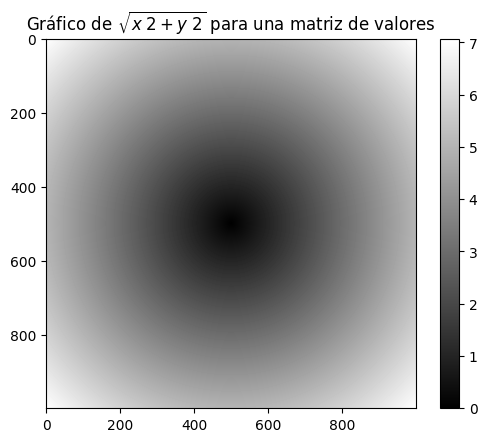

In [169]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Gráfico de $\sqrt {x ^ 2 + y ^ 2}$ para una matriz de valores")
plt.draw();
# plt.close('all')

<a id="logica_condicional"></a>
### Expresando lógica condicional como operaciones sobre Arrays
La función `numpy.where` es una versión vectorizada de la expresión ternaria `x if condición else y`. Supongamos que tenemos una matriz booleana y dos matrices de valores: 

In [170]:
# xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
# yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
# cond = np.array([True, False, True, True, False])

xarr = np.random.randn(1000000)
yarr = np.random.randn(1000000)
cond = np.random.choice(a=[False, True], size=1000000)

Y queremos tomar un valor de `xarr` siempre que el valor correspondiente en `cond` sea `True`, y de lo contrario tomar el valor de `yarr`. Con una lista de comprensión esto podría verse como:

In [171]:
%%timeit
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
len(result)

136 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Esto tiene múltiples problemas. Primero, no será muy rápido para arrays grandes (porque todo el trabajo se está realizando en el código de Python interpretado). En segundo lugar, no funcionará con matrices multidimensionales. Con `np.where` podemos escribir esto de forma concisa:

In [172]:
%%timeit
result = np.where(cond, xarr, yarr)
len(result)

2.41 ms ± 96.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


El segundo y tercer argumento de `where` no necesitan ser matrices, uno o ambos pueden ser escalares. Incluso pueden omitirse, en cuyo caso lo que se obtiene son los índices de los elementos que cumplen la condición:

In [173]:
arr = np.array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])
index_cond = np.where(arr > 5)
index_cond

(array([0, 1, 3, 4], dtype=int64),)

Una ve que tenemos las posiciones es posible extraer los elementos utilizando el método `take`:

In [174]:
arr.take(index_cond)

array([[8, 8, 7, 7]])

Un uso típico en análisis de datos es producir una nueva matriz de valores basados en otra matriz. Supongamos que tenemos una matriz de datos generados aleatoriamente y se desea reemplazar todos los valores `positivos` con `2` y todos los valores `negativos` con `–2`. Esto es muy fácil de hacer con `np.where`:

In [175]:
arr = np.random.randn(4, 4)
arr

array([[-0.2 ,  0.7 , -0.51,  0.49],
       [-0.27, -0.08,  0.98, -0.16],
       [ 1.45,  0.21,  2.05, -0.36],
       [ 0.3 ,  0.62, -0.07,  0.83]])

In [176]:
arr > 0

array([[False,  True, False,  True],
       [False, False,  True, False],
       [ True,  True,  True, False],
       [ True,  True, False,  True]])

In [177]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2,  2],
       [-2, -2,  2, -2],
       [ 2,  2,  2, -2],
       [ 2,  2, -2,  2]])

Se pueden combinar valores escalares y matrices al usar `np.where`. Por ejemplo, se puede reemplazar todos los valores `positivos` en `arr` con la constante`2` así:

In [178]:
np.where(arr > 0, 2, arr) # fija solo los valores positivos a 2

array([[-0.2 ,  2.  , -0.51,  2.  ],
       [-0.27, -0.08,  2.  , -0.16],
       [ 2.  ,  2.  ,  2.  , -0.36],
       [ 2.  ,  2.  , -0.07,  2.  ]])

<a id="metodos_estadisticos"></a>
### Métodos Estadísticos y Matemáticos
Numpy proporciona un conjunto de funciones matemáticas y estadísticas aplicables sobre una matriz completa o sobre los datos de un eje como métodos de la clase de `nparray` y como funciones Numpy. Entre ellas están las agregaciones (a menudo llamadas reducciones) como `sum`, `mean` y `std` (desviación estándar). 

En el siguiente ejemplo se generan datos aleatorios normalmente distribuidos y se computan sobre ellos algunas estadísticas agregadas:

In [179]:
arr = np.random.randn(5, 4)
arr

array([[-0.3 , -0.04, -1.37,  0.83],
       [ 2.32, -0.5 ,  0.16, -1.09],
       [ 1.44, -1.41,  1.61, -2.13],
       [-1.31,  1.24, -1.09,  1.39],
       [-0.66,  0.11,  1.03,  2.3 ]])

In [180]:
arr.mean()

0.12742540959661933

In [181]:
np.mean(arr)

0.12742540959661933

In [182]:
arr.sum()

2.5485081919323864

Algunas funciones como `mean` y `sum` tiene un argumento de eje opcional que calcula la estadística sobre el eje dado, dando como resultado una matriz con una dimensión menor:

In [183]:
arr.mean(axis=1)

array([-0.22,  0.22, -0.12,  0.06,  0.7 ])

In [184]:
arr.sum(axis=0)

array([ 1.49, -0.6 ,  0.35,  1.3 ])

Otros métodos como `cumsum` y `cumprod` no generan valores agregados, en su lugar producen una matriz con los resultados intermedios:

In [185]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

En matrices multidimensionales, las funciones de acumulación como `cumsum `devuelven una matriz del mismo tamaño, pero con los agregados parciales a lo largo de un eje los cálculos se realizan en base a los segmentos dimensionales inferiores:

In [186]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [187]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [188]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

La siguiente tabla muestra los métodos estadísticos básicos aplicables a matrices:  

|Métdodo|Descripción|
|---|:---|
|sum|Suma todos los elementos de un array o a lo largo de un eje, los arrays vacíos suman 0|
|mean|Media aritmética, los arrays vacíos tiene media `NaN`|
|std, var|Desviación estándar y varianza, admiten el ajuste de los grados de libertad|
|min, max|Valores mínimos y máximos|
|argmin, argmax|Índices de los valores mínimos y máximos|
|cumsum|Suma acumulativa de los elementos empezando por 0|
|cumprod|Producto acumulativo de los elementos empezando por 1|

<a id="metodos_boleanos"></a>
### Métodos para Arrays boleanos
Los valores booleanos están asignados a los valores `1` (`True`) y `0` (`False`) en los métodos anteriores. Por lo tanto, la suma se usa a menudo como un medio para contar los valores verdaderos en una matriz booleana:

In [189]:
arr = np.random.randn(100)
(arr > 0).sum() # Número de valores positivos

52

Hay dos métodos adicionales, `all` y `any`, útiles especialmente para matrices booleanas. `any` comprueba si uno o más valores en una matriz son `True`, mientras que `all` comprueb si todos los valores son `True`:

In [190]:
bools = np.array([False, False, True, False])
bools.any()

True

In [191]:
bools.all()

False

Estos métodos también funcionan con arrays no boleanos, en los que los elementos distintos de `0` se evaluan a `True`.

<a id="ordenacion"></a>
### Ordenación
Al igual que las listas de Python, los arrays de Numpy pueden ser ordenados *internamente* (`in-place`) con el método `sort` (si la matriz es una vista en una matriz diferente, la matriz original se modificará):

In [192]:
arr = np.random.randn(6)
arr

array([ 0.7 , -0.85,  0.69, -0.43,  1.45,  1.64])

In [193]:
arr.sort()
arr

array([-0.85, -0.43,  0.69,  0.7 ,  1.45,  1.64])

Se puede ordenar cada sección unidimensional de valores en una matriz multidimensional pasando el número de eje para ordenar:

In [194]:
arr = np.random.randn(5, 3)
arr

array([[ 0.61, -0.13,  2.44],
       [-1.19,  0.63,  1.14],
       [-0.79,  1.4 ,  1.08],
       [ 0.63, -0.34, -0.13],
       [-1.  , -0.79, -1.34]])

In [195]:
arr.sort(1)
arr

array([[-0.13,  0.61,  2.44],
       [-1.19,  0.63,  1.14],
       [-0.79,  1.08,  1.4 ],
       [-0.34, -0.13,  0.63],
       [-1.34, -1.  , -0.79]])

El método `np.sort` devuelve una copia ordenada de una matriz en lugar de modificarla in-situ. Una forma rápida y de calcular los cuantiles de una matriz es ordenarla y seleccionar el valor en un rango particular:

In [196]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # quantil de 5%

-1.522706944505808

<a id="unique"></a>
### Unique y otras lógicas de conjuntos
NumPy tiene algunas operaciones básicas de conjuntos para ndarrays unidimensionales. Uno de uso común es `np.unique`, que devuelve los valores únicos ordenados en una matriz:

In [197]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [198]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

El método `unique` permite recuperar la cuenta de cada item si es necesario:

In [199]:
np.unique(ints, return_counts=True)

(array([1, 2, 3, 4]), array([2, 2, 3, 2], dtype=int64))

Otra función, `np.in1d`, comprueba la pertenencia de los valores en una matriz en otra, devolviendo una matriz booleana:

In [200]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.any(np.in1d(values, [2, 3, 6]))

True

La siguiente tabla muestra las funciones aplicables a conjuntos:  

|Método|Descripción|
|---|:---|
|unique(x)|Devuelve un array ordenado con los elementos únicos de `x`|
|intersect1d(x,y)|Devuelve un array ordenado con los elementos presentes en `x` e `y`|
|union1d(x, y)|Devuelve un array ordenado con los elementos de `x` e `y`|
|in1d(x, y)|Devuelve un array boleano indicando si cada elemento de `x` está contenido en `y`|
|setdiff1d(x, y)|Devuelve un array ordenado con los elementos presentes en `x` y no en `y`|
|setxor1d(x, y)|Devuelve un array ordenado con los elementos presentes en `x` y en `y`, pero no en ambos|


<a id="disco"></a>
## Salvado y recuperación de Arrays en disco
NumPy puede guardar y cargar datos desde y hacia el disco en formato de texto o binario. En esta sección, solo se analiza el formato binario incorporado de NumPy, ya que la mayoría de los usuarios preferirán `pandas` y otras herramientas para cargar texto o datos tabulares.

Las funciones `np.save` y `np.load` permiten guardar y cargar de forma eficiente los datos de una matriz en el disco. Las matrices se guardan de forma predeterminada en un formato binario en crudo (`raw`) sin comprimir con la extensión de archivo `.npy` (si no se incluye la extensión esta se añade por defecto):

In [201]:
arr = np.arange(10)
np.save('some_array', arr)

In [202]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Se pueden guardar múltiples arrays en un archivo sin comprimir usando `np.savez` y pasando los arrays como argumentos de palabras clave:

In [203]:
np.savez('array_archive.npz', a=arr, b=arr)

Al cargar un archivo `.npz`, se recupera un objeto similar a un diccionario que permite la carga de las matrices individualmente:

In [204]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Si los datos de una matriz son susceptibles de comprimirse correctamente, es posible utilizar la función `numpy.savez_compressed` en su lugar:

In [205]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [206]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Una forma estándar de importar conjuntos de datos es usar la función `np.genfromtxt` que puede trabajar con URL web, manejar valores faltantes, múltiples delimitadores, manejar un número irregular de columnas, etc. Una versión menos versátil es el `np.loadtxt` que asume que el conjunto de datos no tiene valores faltantes.

In [207]:
# sin notación científica
np.set_printoptions(suppress=True)  

# Importa los datos desde un fichero CSV
path = './data/auto.csv'
data = np.genfromtxt(path, delimiter=',', skip_header=1, filling_values=-999, dtype='float')
data[:3]  # se ven las 3 primeras filas

array([[  18. ,    8. ,  307. ,  130. , 3504. ,   12. ,   70. ,    1. ,
        -999. ],
       [  15. ,    8. ,  350. ,  165. , 3693. ,   11.5,   70. ,    1. ,
        -999. ],
       [  18. ,    8. ,  318. ,  150. , 3436. ,   11. ,   70. ,    1. ,
        -999. ]])

Dado que todos los elementos en una matriz numpy deben ser del mismo tipo de datos, la última columna que es un texto se importará como un `np.nan` de forma predeterminada. Al establecer el argumento `filling_values` puede reemplazar los valores faltantes con otra cosa.

En el caso, de tener que recuperar la columna de texto tal como está sin reemplazarla con un marcador de posición, se puede establecer el tipo de `dtype` como `object` o como `None`.

In [208]:
data = np.genfromtxt(path, delimiter=',', skip_header=1, dtype='object', encoding='ascii')
data[:3]  # se ven las 3 primeras filas

array([[b'18', b'8', b'307', b'130', b'3504', b'12', b'70', b'1',
        b'"chevrolet chevelle malibu"'],
       [b'15', b'8', b'350', b'165', b'3693', b'11.5', b'70', b'1',
        b'"buick skylark 320"'],
       [b'18', b'8', b'318', b'150', b'3436', b'11', b'70', b'1',
        b'"plymouth satellite"']], dtype=object)

In [209]:
data = np.genfromtxt(path, delimiter=',', skip_header=1, dtype=None, encoding='ascii')
data[:3]  # se ven las 3 primeras filas

array([(18., 8, 307., 130, 3504, 12. , 70, 1, '"chevrolet chevelle malibu"'),
       (15., 8, 350., 165, 3693, 11.5, 70, 1, '"buick skylark 320"'),
       (18., 8, 318., 150, 3436, 11. , 70, 1, '"plymouth satellite"')],
      dtype=[('f0', '<f8'), ('f1', '<i4'), ('f2', '<f8'), ('f3', '<i4'), ('f4', '<i4'), ('f5', '<f8'), ('f6', '<i4'), ('f7', '<i4'), ('f8', '<U38')])

Por último, para exportar la información de un array a un fihero CSV está disponible el mátodo `savetxt`:

In [210]:
# SSalv el array como un fichero CSV, al ser de dtype None es necesario fijar el formato como texto
np.savetxt('./data/out.csv', data, delimiter=",", fmt='%s')

### Ficheros mapeados en memoria
Un archivo mapeado en memoria es un método para interactuar con datos binarios en el disco como si estuviera almacenado en una matriz en memoria. NumPy implementa el objeto `memmap` que es similar a `ndarray`, permitiendo que pequeños segmentos de un archivo grande se lean y escriban sin leer toda la matriz en la memoria. 

Además, un `memmap` tiene los mismos métodos que una matriz en memoria y, por lo tanto, se puede sustituir en muchos algoritmos donde se esperaría un `ndarray`. Tienen, por tanto, la ventaja adicional de permitir trabajar con conjuntos de datos que no se pueden alojar en la memoria RAM por su tamaño.

In [211]:
# fichero mapeado en memoria de unos 800 Mb
mmap = np.memmap('mi_mapa.dat', dtype='float64', mode='w+', shape=(10000, 10000))
mmap

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Segmentar un `memmap` devuelve una vista de los datos en el disco:

In [212]:
section = mmap[:5]
section

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Si asignamos datos a segmentos de un `memmap` éstos se almacenarán en la memoria (como un objeto de archivo Python), pero podremos escribirlos en el disco llamando al método `flush`:

In [213]:
section[:] = np.random.randint(1, 5, size=10000)
mmap

memmap([[3., 4., 3., ..., 2., 1., 2.],
        [3., 4., 3., ..., 2., 1., 2.],
        [3., 4., 3., ..., 2., 1., 2.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [214]:
del mmap
!rm mi_mapa.dat

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Cada vez que un mapa de memoria queda fuera del alcance y se recolecta la basura, los cambios también se actualizarán en el disco. Al abrir un mapa de memoria existente, todavía debe especificar el tipo y la forma, ya que el archivo es solo un bloque de datos binarios sin metadatos en el disco.

<a id="algebra"></a>
## Algebra Lineal
El álgebra lineal, como la multiplicación de matrices, las descomposiciones, los determinantes y otras matemáticas para matrices cuadradas, es una parte importante de cualquier biblioteca de matrices. A diferencia de algunos lenguajes como MATLAB, multiplicar dos matrices bidimensionales con `*` es un producto de elementos en lugar de un producto de puntos matriciales. Numpy proporciona la función y el método `dot` para la multiplicación de matrices:

In [215]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [216]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [217]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [218]:
# x.dot(y) es equivalentente a np.dot(x, y)
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

Un producto entre una matriz bidimensional y una matriz unidimensional de tamaño adecuado da como resultado una matriz unidimensional:

In [219]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [220]:
# El símbolo @ (a partir de Python 3.5) también funciona como un operador para la multiplicación de matrices
x @ np.ones(3)

array([ 6., 15.])

El módulo `numpy.linalg` tiene un conjunto estándar de descomposiciones matriciales y otras operaciones como inverso y determinante que se implementan bajo las mismas bibliotecas de álgebra lineal estándar de la industria que se utilizan en otros idiomas como MATLAB y R, como BLAS, LAPACK, o posiblemente (según su compilación de NumPy) la biblioteca propiedad de Intel MKL (Math Kernel Library):

In [221]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)

In [222]:
# X.T.dot (X) calcula el producto de X con su matriz traspuesta (X.T).
mat = X.T.dot(X)
inv(mat)

array([[ 1.08, -0.18, -0.91, -0.46, -0.23],
       [-0.18,  0.28,  0.16, -0.01,  0.07],
       [-0.91,  0.16,  0.94,  0.39,  0.27],
       [-0.46, -0.01,  0.39,  0.77,  0.25],
       [-0.23,  0.07,  0.27,  0.25,  0.34]])

In [223]:
mat.dot(inv(mat))

array([[ 1.,  0., -0.,  0.,  0.],
       [-0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  1., -0.,  0.],
       [-0.,  0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  0.,  1.]])

In [224]:
q, r = qr(mat)
r

array([[-8.13, -1.79, -8.4 , -1.98,  3.41],
       [ 0.  , -4.49,  1.09, -1.31,  1.58],
       [ 0.  ,  0.  , -1.42,  0.65,  1.97],
       [ 0.  ,  0.  ,  0.  , -2.04,  3.21],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.79]])

La siguiente tabla algunas de las funciones mas comunes de `numpy.linalg`:  

|Función|Descripción|
|---|:---|
|diag|Devuelva los elementos la diagonal principal de una matriz cuadrada (o fuera de ésta) como una matriz `1D`, o convierta una matriz `1D` en una matriz cuadrada con ceros en la diagonal principal|
|dot|Multiplicación de matrices|
|trace|Calcula la suma de los elementos de la diagonal principal|
|det|Calcula el determinante de una matriz|
|eig|Calcula los auto-valores y los auto-vectores de una matriz cuadrada|
|inv|Calcula la inversa de una matriz cuadrada|
|pinv|Calcula el pseudoinverso de Moore-Penrose de una matriz|
|qr|Calcula la descomposición QR|
|svd|Calcula el valor singunar de descomposición (SVD)|
|solve|Resuelve el sistema lineal `Ax = b` para `x`, donde `A` es una matriz cuadrada|
|lstsq|Calcula la solución de mínimos cuadrados para `Ax = b`|


<a id="pseudoaleatorios"></a>
## Generación de número pseudoaleatorios
El módulo `numpy.random` complementa el `Python random` con funciones para generar de manera eficiente matrices completas de valores de muchos tipos de distribuciones de probabilidad. 

Por ejemplo, puede obtener una matriz 4 × 4 de muestras de la distribución normal estándar usando `normal`:

In [225]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.64, -0.56, -0.89, -0.22],
       [-0.64,  0.74,  0.78, -0.22],
       [ 0.98,  1.22,  0.26, -1.37],
       [-0.03, -1.75,  0.77, -1.37]])

El módulo aleatorio incorporado de Python, por el contrario, solo muestrea un valor a la vez. Como se puede ver en este ejemplo, `numpy.random` es al menos un orden de magnitud más rápido para generar muestras muy grandes:

In [226]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

640 ms ± 53.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
24.5 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Estos son números pseudoaleatorios porque son generados por un algoritmo con comportamiento determinista basado en la semilla del generador de números aleatorios de NumPy. Se puede cambiar la semilla de generación de números aleatorios de NumPy usando `np.random.seed`:

In [227]:
np.random.seed(1234)

Las funciones de generación de datos en `numpy.random` utilizan una semilla aleatoria global. Para evitar el `estado global`, puede usar `numpy.random.RandomState` para crear un generador de números aleatorios aislado de otros:

In [228]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47, -1.19,  1.43, -0.31, -0.72,  0.89,  0.86, -0.64,  0.02,
       -2.24])

La siguiente tabla algunas de las funciones mas comunes de `numpy.random`:  

|Función|Descripción|
|---|:---|
|seed|Modifica la semilla del generador de números aleatorios|
|permutation|Devuelve una permutación aleatoria de una secuencia, o devuelve un rango permutado|
|shuffle|Permuta aleatoriamente una secuencia in-situ|
|rand|Genera muestras de una distribución `uniforme`|
|randint|Genera números enteros aleatorios dentro de de un rango dado|
|randn|Genera muestras de una distribución `normal` con media 0 y desviación estándar 1|
|binomial|Genera muestras de una distribución `binomial`|
|normal|Genera muestras de una distribución `normal (Gausiana)`|
|beta|Genera muestras de una distribución `beta`|
|chisquare|Genera muestras de una distribución `chi-cuadrado`|
|gamma|Genera muestras de una distribución `gamma`|
|uniform|Genera muestras de una distribución `uniforme [0,1)`|


Es muy últil el mátodo `choice` que genera valores aleatorios utilizando los valores incluidos en un array unidimensional, permitiendo modificar la probabilidad de los elementos:

In [229]:
np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10)

array(['o', 'u', 'u', 'a', 'e', 'e', 'e', 'i', 'o', 'u'], dtype='<U1')

In [230]:
np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, 0.1, 0.1, 0.4, 0.1]) 

array(['a', 'a', 'a', 'i', 'e', 'o', 'a', 'a', 'i', 'a'], dtype='<U1')

<a id="registros"></a>
## Arrays Estructurados (registros)

Un `ndarray` es un contenedor de **datos homogéneo**, es decir, representa un bloque de memoria en el que cada elemento ocupa el mismo número de bytes, determinado por el tipo de `dtype`. A priori, esto parece no permitir representar datos heterogéneos o de tipo tabular. Una matriz estructurada es un `ndarray` en el que se puede pensar que cada elemento representa una estructura en C (de ahí el nombre "estructurado") o una fila de una tabla SQL con varios campos.

Hay varias formas de especificar un tipo de estructurado. Una forma típica es definir una lista de tuplas con `(nombre_de_campo, tipo_de_datos_de_campo):

In [231]:
xy_dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=xy_dtype)
sarr

array([(1.5 ,  6), (3.14, -2)], dtype=[('x', '<f8'), ('y', '<i4')])

Los elementos de la matriz son objetos similares a tuplas a los que se puede acceder como un diccionario:

In [232]:
sarr[0]

(1.5, 6)

In [233]:
sarr[0]['y']

6

Los nombres de los campos se almacenan en el atributo `dtype.names`. Cuando accede a un campo en la matriz estructurada, se devuelve una vista de los datos, no se copia nada:

In [234]:
sarr['x']

array([1.5 , 3.14])

Al especificar un `dtype` estructurado, también puede pasar un `shape` (como entero o tupla):

In [235]:
xy_dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=xy_dtype)
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

Se pueden expresar estructuras más complicadas y anidadas como un solo bloque de memoria en una matriz. También se pueden anidar `dtypes` para hacer estructuras más complejas:

In [236]:
xy_dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=xy_dtype)
data['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [237]:
data['x']['a']

array([1., 3.])

Comparados con los `DataFrame` de `pandas`, los arrays estructurados de `NumPy` son una herramienta comparativamente de bajo nivel. Proporcionan un medio para interpretar un bloque de memoria como una estructura tabular con columnas anidadas arbitrariamente complejas. Dado que cada elemento de la matriz se representa en la memoria como un número fijo de bytes, las matrices estructuradas proporcionan una forma muy rápida y eficiente de escribir datos en y desde el disco (incluidos los mapas de memoria), transportarlos a través de la red y otros usos similares.

Unuso común para arrays estructurados es escribir archivos de datos como flujos de bytes con registros de longitud fija. Esta es una forma común de serializar datos en código C y C ++, que se encuentra comúnmente en sistemas heredados en la industria. Siempre que se conozca el formato del archivo (el tamaño de cada registro y el orden, tamaño de byte y tipo de datos de cada elemento), los datos se pueden leer en la memoria con `np.fromfile`.

<a id="datetimes"></a>
## Datetimes y Timedeltas
A partir de NumPy 1.7, existen tipos de datos de matriz de núcleo que admiten de forma nativa la funcionalidad de datetime. El tipo de datos se llama `"datetime64"`, llamado así porque "datetime" ya está en uso por la biblioteca datetime incluida en Python.

### Fechas básicas
La forma más básica de crear tiempos de datos es a partir de cadenas en formato de fecha o fecha de la norma ISO 8601. La unidad para almacenamiento interno se selecciona automáticamente de la forma de la cadena y puede ser una unidad de fecha o una unidad de tiempo. Las unidades de fecha son años ('Y'), meses ('M'), semanas ('W') y días ('D'), mientras que las unidades de tiempo son horas ('h'), minutos ('m') ), segundos ('s'), milisegundos ('ms') y algunas unidades basadas en segundos con prefijos adicionales: us-microsegundos, ns-nanosegundos, ps-picosegundos...

In [238]:
# Fecha ISO simple
np.datetime64('2019-02-25')

numpy.datetime64('2019-02-25')

In [239]:
# Utilizando meses
np.datetime64('2019-02')

numpy.datetime64('2019-02')

In [240]:
# Utilizando fechas y horas
np.datetime64('2012-02-25T03:30')

numpy.datetime64('2012-02-25T03:30')

Al crear una matriz de tiempos de datos a partir de una cadena, aún es posible seleccionar automáticamente la unidad de las entradas, utilizando el tipo datetime con unidades genéricas.

In [241]:
np.array(['2019-07-13', '2019-01-13', '2019-08-13'], dtype='datetime64')

array(['2019-07-13', '2019-01-13', '2019-08-13'], dtype='datetime64[D]')

El tipo datetime funciona con muchas funciones NumPy comunes, por ejemplo, `arange` se puede usar para generar rangos de fechas.

In [242]:
np.arange('2019-02', '2019-03', dtype='datetime64[D]')

array(['2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
       '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
       '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
       '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
       '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
       '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28'],
      dtype='datetime64[D]')

El objeto datetime representa un solo momento en el tiempo. Si dos tiempos de datos tienen unidades diferentes, aún pueden representar el mismo momento del tiempo, y la conversión de una unidad más grande como meses a una unidad más pequeña como los días se considera un lanzamiento "seguro" porque el momento del tiempo todavía se está representando exactamente.

In [243]:
np.datetime64('2019') == np.datetime64('2019-01-01')

True

### Fecha y Aritmética Timedelta

NumPy permite la resta de dos valores de fecha y hora, una operación que produce un número con una unidad de tiempo. Debido a que NumPy no tiene un sistema de cantidades físicas en su núcleo, el tipo de datos timedelta64 se creó para complementar datetime64.

Datetimes y Timedeltas trabajan juntos para proporcionar formas para cálculos simples de fecha y hora.

In [244]:
np.datetime64('2009-01-01') - np.datetime64('2008-01-01')

numpy.timedelta64(366,'D')

In [245]:
np.datetime64('2009') + np.timedelta64(20, 'D')

numpy.datetime64('2009-01-21')

In [246]:
np.datetime64('2011-06-15T00:00') + np.timedelta64(12, 'h')

numpy.datetime64('2011-06-15T12:00')

In [247]:
np.timedelta64(1,'W') / np.timedelta64(1,'D')

7.0

In [248]:
np.timedelta64(1,'W') % np.timedelta64(10,'D')

numpy.timedelta64(7,'D')

Hay dos unidades de Timedelta ("Y", años y "M", meses) que se tratan especialmente, porque la cantidad de tiempo que representan los cambios depende de cuándo se utilizan. Si bien una unidad de días de Timedelta equivale a 24 horas, no hay forma de convertir una unidad de mes en días, porque los diferentes meses tienen diferentes números de días.

In [249]:
a = np.timedelta64(1, 'Y')
np.timedelta64(a, 'M')

numpy.timedelta64(12,'M')

In [250]:
np.timedelta64(a, 'D')

TypeError: Cannot cast NumPy timedelta64 scalar from metadata [Y] to [D] according to the rule 'same_kind'

### Funcionalidad de día hábil

Para permitir que la fecha y la hora se utilicen en contextos donde solo ciertos días de la semana son válidos, NumPy incluye un conjunto de funciones de "día de trabajo" (business day)

El valor predeterminado para las funciones de días hábiles es que los únicos días válidos son de lunes a viernes (los días hábiles habituales). La implementación se basa en una "máscara de semana" que contiene 7 banderas booleanas para indicar días válidos; Son posibles las máscaras de semana personalizadas que especifican otros conjuntos de días válidos.

Las funciones de "día de trabajo" pueden además verificar una lista de fechas de "vacaciones", fechas específicas que no son días válidos.

La función `busday_offset` le permite aplicar las compensaciones especificadas en días hábiles a fechas de tiempo con una unidad de 'D' (día).

In [251]:
np.busday_offset('2019-07-19', 1) # viernes

numpy.datetime64('2019-07-22')

Cuando una fecha de entrada cae en el fin de semana o en un día festivo, `busday_offset` primero aplica una regla para pasar la fecha a un día hábil válido, luego aplica la compensación. La regla predeterminada es "elevar", que simplemente genera una excepción. Las reglas más utilizadas son "hacia adelante" y "hacia atrás".

In [252]:
np.busday_offset('2019-07-20', 2)

ValueError: Non-business day date in busday_offset

In [253]:
np.busday_offset('2019-07-20', 2, roll='forward')

numpy.datetime64('2019-07-24')

In [254]:
np.busday_offset('2019-07-20', 2, roll='backward')

numpy.datetime64('2019-07-23')

Para probar un valor de datetime64 para ver si es un día válido, use `is_busday`.

In [255]:
np.is_busday(np.datetime64('2019-07-19'))  # viernes

True

In [256]:
np.is_busday(np.datetime64('2019-07-20')) # sábado

False

Para encontrar cuántos días válidos hay en un rango específico de fechas datetime64, use `busday_count`:

In [257]:
np.busday_count(np.datetime64('2019-07-19'), np.datetime64('2019-07-29'))

6

In [258]:
np.busday_count(np.datetime64('2019-07-29'), np.datetime64('2019-07-19'))

-6

Si tiene una matriz de valores de datetime64 días y desea un conteo de cuántos de ellos son fechas válidas, puede hacer esto:

In [259]:
a = np.arange(np.datetime64('2019-07-19'), np.datetime64('2019-07-29'))
np.count_nonzero(np.is_busday(a))

6

---